In [7]:
import pydicom
ds_1 = pydicom.filereader.dcmread("stage_2_train/ID_7fbaf4195.dcm")
ds_1 = pydicom.filereader.dcmread("stage_2_train/ID_7fbc278c9.dcm")
ds_1 = pydicom.filereader.dcmread("stage_2_train/ID_7fbcd4bf4.dcm")
ds_1 = pydicom.filereader.dcmread("stage_2_train/ID_7fbd49a69.dcm")
ds_1 = pydicom.filereader.dcmread("stage_2_train/ID_7fbfc491c.dcm")

In [ ]:
def prep_dataframe(directory, csv):
    diagnoses = pd.read_csv(csv)
    diagnoses = diagnoses.to_numpy()
    more = np.empty((len(diagnoses), 3), dtype = 'U18')
    for x in range(len(diagnoses)):
        more[x][0] = diagnoses[x][0][3:12]
        more[x][1] = diagnoses[x][0][13:]

    more[:,2] = diagnoses[:,1]

    test_list = os.listdir(directory)[0:count+1]
    image_arrays = np.zeros([512, 512])
    df = pd.DataFrame(columns = ["Image", "ID", "Diagnoses", "Hemmorhage"])

    for file in test_list:
        if(file != ".DS_Store"):
            dataset = pydicom.dcmread(directory+"/"+file, force = True)
            #image_arrays = np.dstack((image_arrays, dataset.pixel_array))
            try:
                diagnoses = more[:,1:][more[:,0]==file[3:12]]
                filtered_diagnoses = diagnoses[:,0][diagnoses[:,1]=='1']
                any_diagnosis = filtered_diagnoses.size != 0
                df = df.append({"Image": dataset.pixel_array, "ID": file[3:12], 
                                "Diagnoses": filtered_diagnoses, 
                               "Hemmorhage": any_diagnosis}, ignore_index = True)
            except:
                print("Error with file "+file)  
    return df

In [25]:
file_paths[0]

'/home/wustl/brooks.kennedy/stage_2_train/ID_281278dce.dcm'

In [17]:
f = pydicom.read_file(file_paths[0])
f.SeriesInstanceUID

'ID_3d9dd72e5a'

In [3]:
import glob
import pydicom
import matplotlib.pyplot as plt
from collections import defaultdict
from shutil import copyfile
import os
import pydicom
import pandas as pd

In [12]:
file_paths = glob.glob("/home/wustl/brooks.kennedy/stage_2_train/*")

Move files to their respective folders:

In [15]:
# dict for counting number of files for each patient ID
#patient_id_count = defaultdict(lambda: 0)

for fname in file_paths:
    #print("now moving: "+fname)
    f = pydicom.read_file(fname, force = True)
    try:
        id = f.PatientID    # this gets the patient ID from the current file
        if not os.path.exists("patient_sorted_train/"+id):
            os.mkdir("patient_sorted_train/"+id)
        file = open("patient_sorted_train/"+id+"/"+f.SOPInstanceUID+".dcm", "w")
        copyfile("stage_2_train/"+f.SOPInstanceUID+".dcm", "patient_sorted_train/"+id+"/"+f.SOPInstanceUID+".dcm")
    except:
        print("file "+f.filename+" has no patient ID")
    

file stage_2_train/ID_199e82a88.dcm has no patient ID


actually, do it again by series number:

In [28]:
for fname in file_paths:
    #print("now moving: "+fname)
    f = pydicom.read_file(fname, force = True)
    try:
        id = f.SeriesInstanceUID    # this gets the series ID from the current file
        if not os.path.exists("/home/wustl/brooks.kennedy/series_sorted_train/"+id):
            os.mkdir("/home/wustl/brooks.kennedy/series_sorted_train/"+id)
            #print("made new series directory")
        file = open("/home/wustl/brooks.kennedy/series_sorted_train/"+id+"/"+f.SOPInstanceUID+".dcm", "w")
        copyfile("/home/wustl/brooks.kennedy/stage_2_train/"+f.SOPInstanceUID+".dcm", "/home/wustl/brooks.kennedy/series_sorted_train/"+id+"/"+f.SOPInstanceUID+".dcm")
    except:
        print("file "+f.filename+" has no series ID")

file /home/wustl/brooks.kennedy/stage_2_train/ID_199e82a88.dcm has no series ID


In [8]:
pydicom.read_file(file_paths[0])

'ID_281278dce'

print every image for a certain patient:

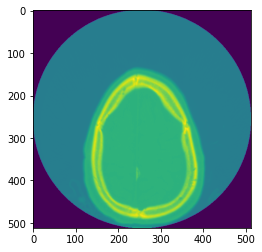

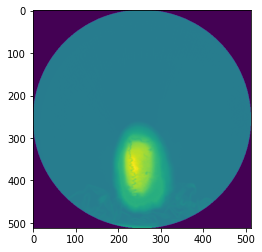

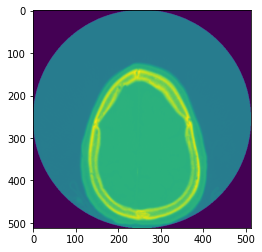

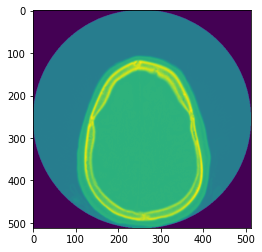

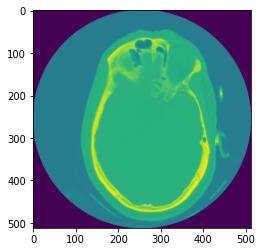

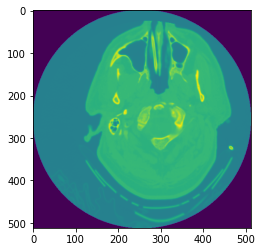

In [16]:
patient = glob.glob("patient_sorted_train/ID_54d8494c/*")
for f in patient:
    #print(f)
    img = pydicom.read_file(f, force = True).pixel_array
    plt.imshow(img)
    plt.show()

In [4]:
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_249d4b04a.dcm", force = True)
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_6d9813b61.dcm", force = True)
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_c58321025.dcm", force = True)
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_66682bb80.dcm", force = True)
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_a64076f87.dcm", force = True)
# pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_e7e19c81e.dcm", force = True)

In [18]:
pydicom.read_file("patient_sorted_train/ID_54d8494c/ID_249d4b04a.dcm", force = True)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.100232942821695964336319700447951269254
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_249d4b04a
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_54d8494c'
(0020, 000d) Study Instance UID                  UI: ID_58a65829ea
(0020, 000e) Series Instance UID                 UI: ID_f851302ae0
(0020, 0010) Study ID                            SH: '

In [22]:
glob.glob(glob.glob("patient_sorted_train/*")[0]+"/*")

['patient_sorted_train/ID_06da93d3/ID_721c7ceb0.dcm',
 'patient_sorted_train/ID_06da93d3/ID_6d4c2d6dd.dcm',
 'patient_sorted_train/ID_06da93d3/ID_72ad5cbfd.dcm']

In [6]:
patient_file_paths = []
for patient in glob.glob("/home/wustl/brooks.kennedy/patient_sorted_train/*"):
    patient_file_paths.append(glob.glob(patient+"/*"))

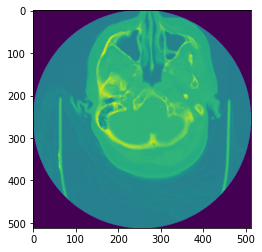

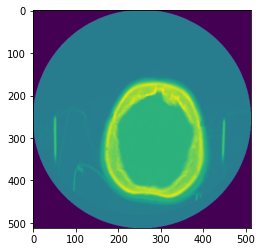

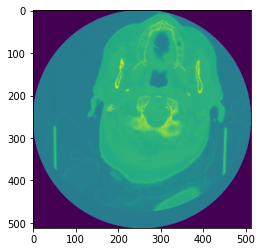

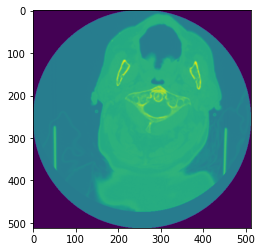

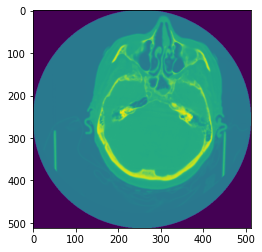

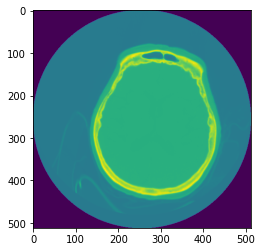

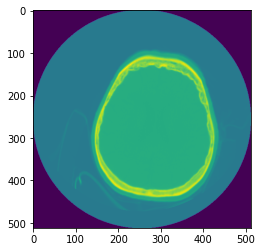

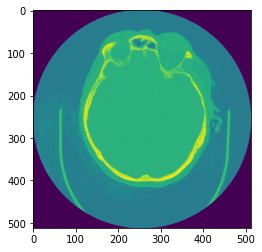

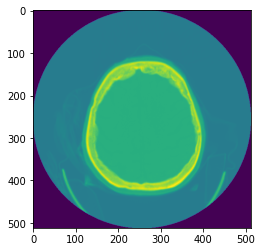

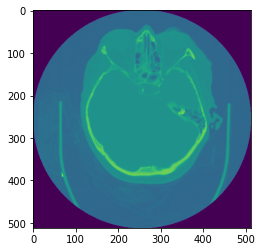

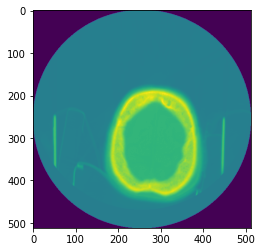

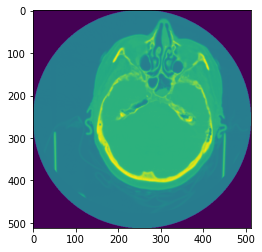

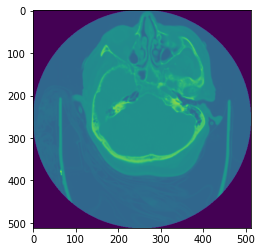

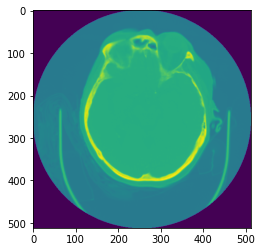

In [5]:
for f in patient_file_paths[8]:
    #print(f)
    img = pydicom.read_file(f, force = True).pixel_array
    plt.imshow(img)
    plt.show()

In [7]:
patient_file_paths[8]

['/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_c7ec52db6.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_ce818cbc4.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_05c181375.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_9697c8f5a.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_7694b518d.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_1f3d12725.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_f655642d7.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_6d2981e56.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_8c2eb03e3.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_a1194b781.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_a9bb5bac0.dcm',
 '/home/wustl/brooks.kennedy/patient_sorted_train/ID_59ecf187/ID_b5edb4bdb.dcm',
 '/home/wustl/brooks.kennedy

/usr/bin/sh: -c: line 0: syntax error near unexpected token `"/home/wustl/brookskennedy/series_sorted_train/"'
/usr/bin/sh: -c: line 0: `mkdir ("/home/wustl/brookskennedy/series_sorted_train/")'


In [7]:
diagnoses = pd.read_csv(stage_2_train.csv)
for patient in glob.glob("patient_sorted_train/*")::
    for f in patient:
        img = pydicom.read_file(f, force = True).pixel_array

3
2
2
6
6
4
5
7
14
10
5
3
3
1
7
4
9
2
3
6
2
10
5
3
8
5
2
3
7
1
5
1
1
2
2
2
3
9
4
6
3
11
5
4
4
4
4
7
7
4
6
6
2
8
5
8
2
6
2
2
2
4
4
6
10
4
2
3
5
5
3
2
4
2
1
3
6
6
4
5
6
9
3
2
5
5
5
7
1
4
4
7
3
4
8
3
18
17
3
16
7
4
5
11
4
3
5
2
5
4
9
1
12
3
3
4
5
7
4
3
8
7
5
4
5
2
4
4
6
12
3
7
3
4
5
6
8
2
6
4
2
2
4
5
6
7
6
5
4
2
2
6
4
5
7
1
6
6
2
7
6
3
6
4
5
6
7
7
3
4
4
6
3
6
7
3
5
8
3
2
4
4
6
3
4
3
3
4
5
6
9
6
4
3
4
5
3
18
4
5
5
16
7
3
8
5
2
3
5
4
13
3
3
3
8
11
2
3
5
4
6
5
3
2
2
6
5
4
16
5
8
7
1
6
6
7
5
8
4
6
6
3
4
23
2
4
4
5
4
5
5
6
10
4
10
3
4
4
4
3
5
8
3
4
9
3
5
3
5
3
3
2
5
6
6
4
2
5
6
2
6
8
2
1
7
3
6
4
5
3
4
7
4
5
6
6
5
3
8
6
5
4
3
1
9
4
7
23
8
7
5
5
4
5
4
4
5
9
1
3
6
6
7
4
3
6
2
8
3
3
6
6
9
5
10
7
6
1
4
7
12
5
3
3
3
7
3
3
4
12
2
4
1
5
8
5
4
3
5
5
11
4
7
5
5
6
9
6
8
5
3
4
5
6
4
3
4
4
6
3
1
9
7
4
4
7
3
5
4
4
4
4
4
6
3
7
2
6
7
4
3
7
5
4
3
5
6
6
3
5
6
4
8
6
7
9
1
3
2
5
4
3
2
7
6
5
10
3
3
2
5
5
5
12
5
4
7
3
4
5
2
8
6
6
6
3
5
4
13
1
5
15
3
2
6
8
5
8
10
6
7
4
5
1
3
9
4
4
7
3
6
4
6
6
5
39
2
5
13
6
1
4
5
7
1

In [1]:
patient_file_paths

NameError: name 'patient_file_paths' is not defined